In [2]:
import pandas as pd
import seaborn as sn


In [4]:
# Load data
df = pd.read_csv("/home/akeemlag/Downloads/weight-height.csv")

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

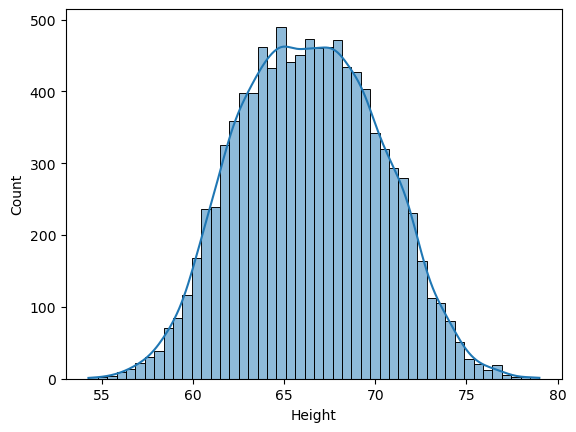

In [7]:
sn.histplot(df.Height, kde=True);

In [8]:
mean = df.Height.mean()

mean

66.36755975482124

In [9]:
std_deviation = df.Height.std()

std_deviation

3.8475281207732324

In [10]:
mean - 3*std_deviation

54.82497539250154

In [12]:
mean + 3*std_deviation

77.91014411714094

In [14]:
# Removing outliers with std

df[(df.Height < 54.825) | (df.Height > 77.91)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [18]:
df_no_outlier = df[(df.Height > 54.825) & (df.Height < 77.91)]

df_no_outlier.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [25]:
# Create the z-score
df["zscore"] = (df.Height-df.Height.mean())/df.Height.std()

df.shape

(10000, 5)

In [30]:
# Use Zscore to remove outliers

df_no_outlier = df[(df.zscore>-3) & (df.zscore<3)]

df_no_outlier.shape

(9993, 5)

In [16]:
"""
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles
After removing outliers in step 1, you get a new dataframe.
On step(2) dataframe, use 4 standard deviation to remove outliers
Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram
On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

"""
import pandas as pd
import seaborn as sn

# Read the data using pandas
df = pd.read_csv("/home/akeemlag/Downloads/bengaluru_house_prices.csv")

df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.price.describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

In [7]:
# Removing outliers using percentile
min_threshold, max_threshold = df.price.quantile([0.001, 0.999])

df_no_outlier = df[(df.price > min_threshold) & (df.price < max_threshold)]

df_no_outlier.price.describe()

count    13291.000000
mean       110.010361
std        125.434347
min         11.500000
25%         50.000000
50%         72.000000
75%        120.000000
max       1950.000000
Name: price, dtype: float64

In [10]:
# Using std to remove outliers

mean = df_no_outlier.price.mean()

std_deviation = df_no_outlier.price.std()

mean, std_deviation

(110.01036077044617, 125.43434724473614)

In [12]:
first_value = mean - 4*std_deviation

second_value = mean + 4*std_deviation

print(f'first_value: {first_value} and second value: {second_value}')

first_value: -391.7270282084984 and second value: 611.7477497493908


In [14]:

df_four_std = df_no_outlier[(df_no_outlier.price > mean-4*std_deviation) & (df_no_outlier.price < (mean+std_deviation))]
df_four_std.price.describe()

count    12109.000000
mean        80.457074
std         45.223509
min         11.500000
25%         48.000000
50%         67.000000
75%        100.000000
max        235.000000
Name: price, dtype: float64

<AxesSubplot: xlabel='price', ylabel='Count'>

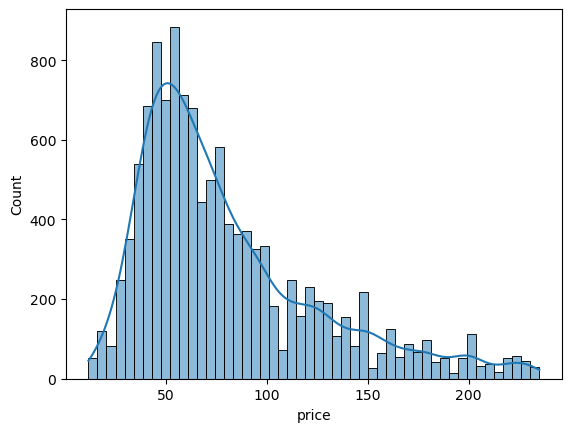

In [18]:
sn.histplot(df_four_std["price"], kde=True)

In [22]:
# Using zscore
# First create a zscore column
df_no_outlier["zscore"] = (mean - df_no_outlier.price) / df_no_outlier.price.std()

In [23]:
df_no_outlier

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0.565558
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,-0.079640
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,0.382753
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0.119667
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0.470448
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,-0.964565
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,-2.311884
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,0.398698
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,-3.013446


In [26]:
# use zscore 4 to remove outliers

df_no_outlier = df_no_outlier[(df_no_outlier.zscore<4) & (df_no_outlier.zscore>-4)]

df_no_outlier.describe()

,bath,balcony,price,zscore
count,13072.000000,12571.000000,13144.000000,13144.000000
mean,2.666692,1.583009,101.116989,0.070901
std,1.277704,0.816113,86.942006,0.693128
min,1.000000,0.000000,11.500000,-3.986066
25%,2.000000,1.000000,50.000000,-0.063696
50%,2.000000,2.000000,70.442500,0.315447
75%,3.000000,2.000000,118.000000,0.478420
max,27.000000,3.000000,610.000000,0.785354
